In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
dt= pd.read_csv(
    "https://raw.githubusercontent.com/benvictoria17/pandas/master/dataset/Gufhtugu%20Publications%20Dataset%20Challenge/GP%20Orders%20-%205.csv",
    encoding='UTF-8')

import warnings  
warnings.filterwarnings('ignore')

In [2]:
dt.head()

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,10/3/2019 15:03,faisalabad,NaN,2,200.0
1,308,Completed,Kaggle for Begginers,10/3/2019 15:54,Rawalpindi,Cash on Delivery (COD),1,200.0
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,10/3/2019 16:09,Hyderabad,Cash on Delivery (COD),2,200.0
3,310,Cancelled,Kaggle for Begginers,10/3/2019 16:42,Rawalpindi,Cash on Delivery (COD),1,200.0
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 16:44,Karachi,Cash on Delivery (COD),1,200.0


In [3]:
print("dimensions are :", dt.shape)

dimensions are : (19239, 8)


In [4]:
print(dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order Number          19239 non-null  int64  
 1   Order Status          19239 non-null  object 
 2   Book Name             19237 non-null  object 
 3   Order Date & Time     19239 non-null  object 
 4   City                  19238 non-null  object 
 5   Payment Method        19229 non-null  object 
 6   Total items           19239 non-null  int64  
 7   Total weight (grams)  19239 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ MB
None


In [5]:
dt[dt.isna().any(axis=1)]

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,10/3/2019 15:03,faisalabad,NaN,2,200.0
6,313,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,10/3/2019 19:04,Lahore,NaN,2,200.0
12350,60457,Returned,NaN,11/14/2020 0:00,Dera Ismail Khan,BankTransfer,0,200.0
15266,65221,Completed,"Blockchain, Cryptocurrency And Bitcoin/R ka Ta...",12/17/2020 7:18,NaN,BankTransfer,6,500.0
16976,67823,Returned,NaN,1/2/2021 20:31,Karachi,EasyPaisa,0,200.0
19070,70795,Completed,Europe Ke Baankey,1/16/2021 20:45,d i khan,NaN,1,200.0
19087,70819,Completed,Safar e Hajj,1/16/2021 23:56,Islamabad,NaN,1,200.0
19134,70883,Completed,Fasana Ajaib/Safar e Hajj,1/18/2021 12:09,"Jauharabad , Distt Khushab",NaN,2,200.0
19154,70921,Completed,Dilli Gadar Se Pehle/Purane Lakhnau Ki Jhalkiy...,1/19/2021 2:33,mansehra,NaN,6,200.0
19155,70922,Completed,Ajaibaat E Farang/Europe Ke Baankey,1/19/2021 2:39,mansehra,NaN,3,200.0


In [6]:
dt=dt.dropna()

In [7]:
dt = dt.rename(columns={'Order Number': 'Order_Number',"Order Status":"Order_Status", "Book Name":"Book_Name","Order Date & Time":"Date_Time","Payment Method":"Payment_Method","Total items":"Total_Items","Total weight (grams)":"Weight"})
dt.columns

Index(['Order_Number', 'Order_Status', 'Book_Name', 'Date_Time', 'City',
       'Payment_Method', 'Total_Items', 'Weight'],
      dtype='object')

In [8]:
dt['Order_Status'] = dt['Order_Status'].astype(str)
dt["Book_Name"]=dt["Book_Name"].astype(str)
dt["Date_Time"]=dt["Date_Time"].astype(str)
dt["City"]=dt["City"].astype(str)
dt["Payment_Method"]=dt["Payment_Method"].astype(str)
dt['Date_Time'] = pd.to_datetime(dt['Date_Time'])
dt["Book_Name"].str.encode('utf-8')
print(dt.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19226 entries, 1 to 19238
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order_Number    19226 non-null  int64         
 1   Order_Status    19226 non-null  object        
 2   Book_Name       19226 non-null  object        
 3   Date_Time       19226 non-null  datetime64[ns]
 4   City            19226 non-null  object        
 5   Payment_Method  19226 non-null  object        
 6   Total_Items     19226 non-null  int64         
 7   Weight          19226 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.3+ MB
None


In [9]:
dt = dt.sort_values('Date_Time') 

dt['Date']  = dt['Date_Time'].dt.date
dt['Year']  = dt["Date_Time"].dt.year
dt["Month"] = dt["Date_Time"].dt.month_name()
dt["Day"]   = dt["Date_Time"].dt.day_name()
dt['Hour']  = dt['Date_Time'].dt.hour
dt['Time']  = dt['Date_Time'].dt.time
dt["MY"]=pd.to_datetime(dt['Date_Time']).dt.to_period('M')
dt["MY"]= dt["MY"].dt.strftime('%Y-%m')

dt.columns

Index(['Order_Number', 'Order_Status', 'Book_Name', 'Date_Time', 'City',
       'Payment_Method', 'Total_Items', 'Weight', 'Date', 'Year', 'Month',
       'Day', 'Hour', 'Time', 'MY'],
      dtype='object')

In [10]:
print('No of rows BEFORE splitting : ',dt.shape[0])

scol = dt['Book_Name'].str.split('/', expand=True).stack()
scol.index = scol.index.droplevel(-1) 
scol.name = 'Book_Name' 
dt = dt.drop(columns='Book_Name').join(scol)

print('No of rows AFTER splitting : ',dt.shape[0])

No of rows BEFORE splitting :  19226
No of rows AFTER splitting :  33229


In [11]:
topcities=dt.groupby("City")["Order_Number"].count().reset_index().sort_values("Order_Number", ascending=False).head(50)

topcities

,City,Order_Number
1492,Karachi,4632
1797,Lahore,3814
1244,Islamabad,2254
2736,Rawalpindi,1139
822,Faisalabad,857
2518,Peshawar,699
2212,Multan,697
3765,karachi,520
1010,Gujranwala,468
1209,Hyderabad,397


In [12]:
dt['City'] = dt['City'].replace(['karachi','KARACHI'],'Karachi')
dt['City'] = dt['City'].replace(['lahore','LAHORE'],'Lahore')
dt['City'] = dt['City'].replace(['ISLAMABAD','islamabad'],'Islamabad')
#print("AFTER rename:", len(df["City"].unique())) 

topcities=topcities=dt.groupby("City")["Order_Number"].count().reset_index().sort_values("Order_Number", ascending=False).head(10)

topcities

,City,Order_Number
1490,Karachi,5357
1794,Lahore,4142
1243,Islamabad,2417
2733,Rawalpindi,1139
822,Faisalabad,857
2515,Peshawar,699
2209,Multan,697
1010,Gujranwala,468
1209,Hyderabad,397
3079,Sialkot,370


In [13]:
temp=dt.groupby("Book_Name")["Order_Number"].count().reset_index().sort_values("Order_Number", ascending=False).head(30)
temp

,Book_Name,Order_Number
1619,انٹرنیٹ سے پیسہ کمائیں,3507
1111,Python Programming,2412
198,Artificial Intelligence,2104
326,"Blockchain, Cryptocurrency And Bitcoin",1905
1106,Product Management,1553
777,Justju ka safar-1,1493
1745,ڈیٹا سائنس,978
1718,مشین لرننگ,848
1316,Sukkur To Florida,685
1,(C++),654


In [14]:
print("Before rename:", len(dt["Book_Name"].unique())) 
dt['Book_Name'] = dt['Book_Name'].replace(['انٹرنیٹ سے پیسہ کمائیں؟- مستحقین زکواة'],'انٹرنیٹ سے پیسہ کمائیں')
dt['Book_Name'] = dt['Book_Name'].replace(['ڈیٹا سائنس ۔ ایک تعارف','ڈیٹا سائنس'],'Data Science')
dt['Book_Name'] = dt['Book_Name'].replace(['Python Programming- Release Date: August 14, 2020'],'Python Programming')

print("AFTER rename:", len(dt["Book_Name"].unique()))

Before rename: 1761
AFTER rename: 1757


In [15]:
dt.head(10)

,Order_Number,Order_Status,Date_Time,City,Payment_Method,Total_Items,Weight,Date,Year,Month,Day,Hour,Time,MY,Book_Name
1,308,Completed,2019-10-03 15:54:00,Rawalpindi,Cash on Delivery (COD),1,200.0,2019-10-03,2019,October,Thursday,15,15:54:00,2019-10,Kaggle for Begginers
2,309,Completed,2019-10-03 16:09:00,Hyderabad,Cash on Delivery (COD),2,200.0,2019-10-03,2019,October,Thursday,16,16:09:00,2019-10,Kaggle for Begginers
2,309,Completed,2019-10-03 16:09:00,Hyderabad,Cash on Delivery (COD),2,200.0,2019-10-03,2019,October,Thursday,16,16:09:00,2019-10,Bitcoin Blockchain aur Crypto Currency - FREE ...
3,310,Cancelled,2019-10-03 16:42:00,Rawalpindi,Cash on Delivery (COD),1,200.0,2019-10-03,2019,October,Thursday,16,16:42:00,2019-10,Kaggle for Begginers
4,311,Completed,2019-10-03 16:44:00,Karachi,Cash on Delivery (COD),1,200.0,2019-10-03,2019,October,Thursday,16,16:44:00,2019-10,Bit Coin Block Chain aur Crypto Currency بٹ کو...
5,312,Completed,2019-10-03 18:17:00,FSD,Cash on Delivery (COD),5,200.0,2019-10-03,2019,October,Thursday,18,18:17:00,2019-10,Bit Coin Block Chain aur Crypto Currency بٹ کو...
5,312,Completed,2019-10-03 18:17:00,FSD,Cash on Delivery (COD),5,200.0,2019-10-03,2019,October,Thursday,18,18:17:00,2019-10,Kaggle for Begginers
5,312,Completed,2019-10-03 18:17:00,FSD,Cash on Delivery (COD),5,200.0,2019-10-03,2019,October,Thursday,18,18:17:00,2019-10,(C++) ++سی
5,312,Completed,2019-10-03 18:17:00,FSD,Cash on Delivery (COD),5,200.0,2019-10-03,2019,October,Thursday,18,18:17:00,2019-10,سی
5,312,Completed,2019-10-03 18:17:00,FSD,Cash on Delivery (COD),5,200.0,2019-10-03,2019,October,Thursday,18,18:17:00,2019-10,Introduction to Blockchain with Case Studies


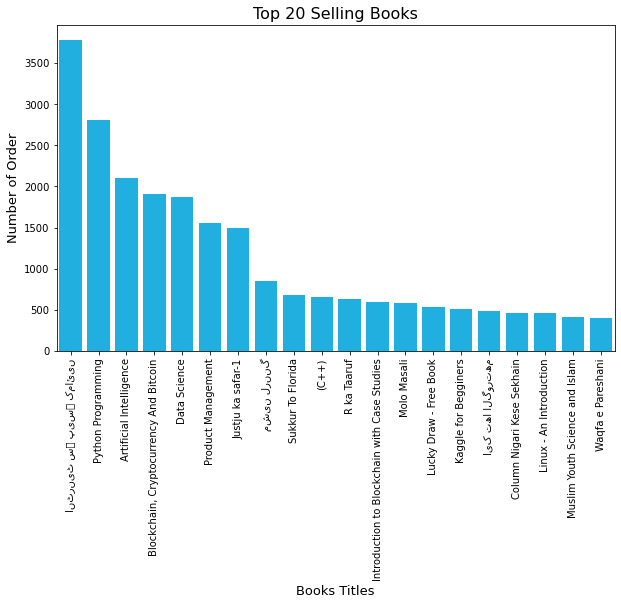

In [16]:
bnon=dt.groupby("Book_Name")["Order_Number"].count().reset_index().sort_values("Order_Number", ascending=False).head(20)


fig, ax = plt.subplots()
ax=sns.barplot(x="Book_Name",y="Order_Number",data=bnon, color="deepskyblue")
ax.set_xticklabels(bnon["Book_Name"], rotation=90)
fig.set_size_inches([10, 6])
ax.set_title('Top 20 Selling Books',fontsize=16)
ax.set_xlabel("Books Titles",fontsize=13)
ax.set_ylabel("Number of Order",fontsize=13) 
plt.show()

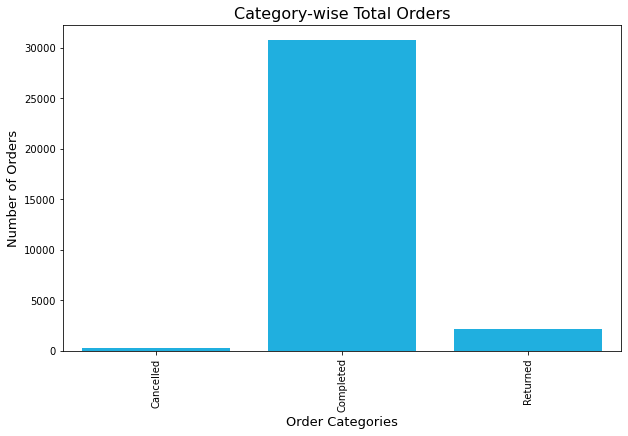

In [17]:
dtos=dt.groupby(["Order_Status"])["Order_Number"].count().reset_index()
#sns.countplot(x="Order_Status", data=dtos)

fig, ax = plt.subplots()
ax=sns.barplot(x="Order_Status",y="Order_Number",data=dtos,color="deepskyblue")
ax.set_xticklabels(dtos["Order_Status"], rotation=90)
fig.set_size_inches([10, 6])
ax.set_title('Category-wise Total Orders',fontsize=16)
ax.set_ylabel("Number of Orders",fontsize=13) 
ax.set_xlabel("Order Categories",fontsize=13)
plt.show()

<AxesSubplot:xlabel='Order_Status', ylabel='count'>

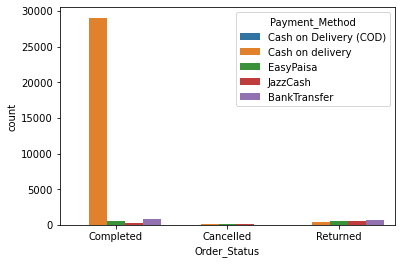

In [18]:
sns.countplot(x="Order_Status",hue="Payment_Method", data=dt)

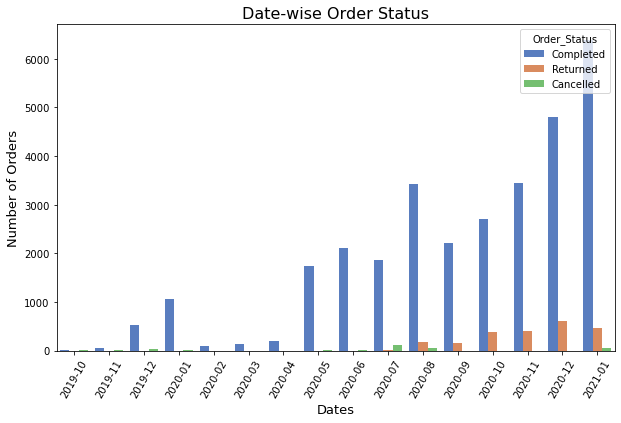

In [19]:
dton=dt.groupby(["Order_Status","MY"])["Order_Number"].count().reset_index().sort_values("Order_Number", ascending=False)
dton=dton.sort_values("MY")

fig, ax = plt.subplots()
ax.set_xticklabels(dton["MY"], rotation=60)
fig.set_size_inches([10, 6])

ax=sns.barplot(x="MY",y="Order_Number",hue="Order_Status",hue_order=["Completed", "Returned", "Cancelled"],data=dton,palette="muted")
ax.set_title('Date-wise Order Status',fontsize=16)
ax.set_xlabel("Dates",fontsize=13)
ax.set_ylabel("Number of Orders",fontsize=13) 
plt.show()